<h1>Basic Visualization Tools with Python</h1>

In [6]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
#!conda install -c anaconda xlrd --yes # Used to allow us to download and import our primary Canadian Immigration dataset using pandas read_excel() method
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [7]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
# For consistency, ensure that all column labels of type string.
# all(isinstance(column, str) for column in df_can.columns)
# df_can.columns = list(map(str, df_can.columns))
# all(isinstance(column, str) for column in df_can.columns)
df_can['Total'] = df_can.sum(axis=1)
df_can.set_index('Country', inplace=True)
df_can.index.name = None
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


<h2>Area Plots</h2>
<p>Generate area plots for the countries with the highest number of immigration to Canada</p>

In [8]:
df_can.sort_values(['Total'], ascending = False, axis = 0, inplace = True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [32]:
years = list(map(int, range(1980, 2014)))
df_top5 = df_can.head()
df_top5 = df_top5[years].transpose()
df_top5.head()

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt

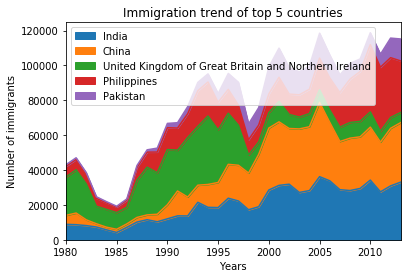

In [34]:
df_top5.plot(kind='area')
plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

<h2>Histograms</h2>

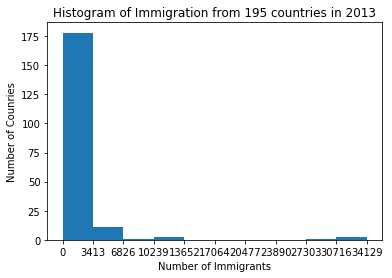

In [40]:
#df_can[2013].plot(kind='hist')
count, bin_edges = np.histogram(df_can[2013])
df_can[2013].plot(kind='hist', xticks = bin_edges)
plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Counries')
plt.xlabel('Number of Immigrants')
plt.show()

<h2>Bar Charts</h2>

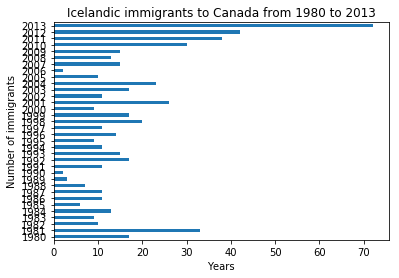

In [44]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.plot(kind='bar')
#df_iceland.plot(kind='barh') #horizontal
plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()